In [1]:
# Generating a toy dataset.
# DO NOT MODIFY THIS PART

import numpy as np
import math
import random as rand

paras = list((rand.random() - 0.5 for _ in range(9)))

def y_gen(x):
    h_11 = math.tanh(paras[0] * x[0] + paras[1] * x[1] + paras[2])
    h_12 = math.tanh(paras[3] * x[0] + paras[4] * x[1] + paras[5])
    h_21 = 1/(1 + np.exp(-(paras[6] * h_11 + paras[7] * h_12 + paras[8])))
    return h_21 + ((rand.random()-0.5)/100 if rand.random()>0.6 else 0)

n = 300
x = list(zip((rand.random() - 0.5 for _ in range(n)), (rand.random() - 0.5 for _ in range(n))))
y = list(map(y_gen, x))
y = [(i-min(y))/(max(y)-min(y)) for i in y]

In [2]:
# Spliting dataset into training, validation, and test.
# DO NOT MODIFY THIS PART

from sklearn.model_selection import train_test_split

r = 0.25
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=r)

x_val = x_train[:int(n*r)]
partial_x_train = x_train[int(n*r):]
y_val = y_train[:int(n*r)]
partial_y_train = y_train[int(n*r):]

*** Write down your answer here ***

Formula of bias for layer 2

$$\frac{\partial L}{\partial b^2} = ({\hat{y}} - y) * (h^2_{1}(1 - h^2_{1})) * 1$$

Formula of weights of layer 2
$$\frac{\partial L}{\partial \vec{w}^{\,(2)}} = \begin{bmatrix}
\frac{\partial L}{\partial w^2_{11}}\\
\frac{\partial L}{\partial w^2_{21}}
\end{bmatrix} = \begin{bmatrix} (\hat{y} - y^2) * h^2_{1}(1 - h^2_{1} * h^1_{1})\\(\hat{y} - y) * h^2_{1}(1 - h^2_{1} * h^1_{2}) \end{bmatrix}
$$

Formula of biases of layer 1
$$\frac{\partial L}{\partial \vec{b}^{\,(1)}} =\begin{bmatrix}
\frac{\partial L}{\partial b^1_1}\\
\frac{\partial L}{\partial b^1_2}
\end{bmatrix} = \begin{bmatrix} (\hat{y} - y) * h^2_{1}(1 - h^2_{1}) * h^1_{1} * (1 - (h^1_{1})^2) * 1\\(\hat{y} - y) * h^2_{1}(1 - h^2_{1}) * h^1_{2} * (1 - (h^1_{2})^2) * 1 \end{bmatrix}
$$

Formula of weights of layer 1
$$
\frac{\partial L}{\partial \vec{W}^{\,(1)}} =\begin{bmatrix}
\frac{\partial L}{\partial w^1_{11}} & \frac{\partial L}{\partial w^1_{12}}\\
\frac{\partial L}{\partial w^1_{21}} & \frac{\partial L}{\partial w^1_{22}}
\end{bmatrix} = \begin{bmatrix} (\hat{y} - y) * h^2_{1}(1 - h^2_{1}) * h^1_{1} * (1 - (h^1_{1})^2) * h^0_{1}&(\hat{y} - y) * h^2_{1}(1 - h^2_{1}) * h^1_{2} * (1 - (h^1_{2})^2) * h^0_{1} \\(\hat{y} - y) * h^2_{1}(1 - h^2_{1}) * h^1_{1} * (1 - (h^1_{1})^2) * h^0_{2}&(\hat{y} - y) * h^2_{1}(1 - h^2_{1}) * h^1_{2} * (1 - (h^1_{2})^2) * h^0_{2}\end{bmatrix}
$$

In [3]:
partial_x_train=np.asarray(partial_x_train)
partial_y_train = np.asarray(partial_y_train)
x_val = np.asarray(x_val)
y_val = np.asarray(y_val)

In [4]:
print("partial_x_train: ",partial_x_train.shape)
print("partial_y_train: ",partial_y_train.shape)
print("x_val: ",x_val.shape)
print("y_val: ",y_val.shape)

partial_x_train:  (150, 2)
partial_y_train:  (150,)
x_val:  (75, 2)
y_val:  (75,)


In [5]:
partial_y_train = partial_y_train.reshape(150, 1)
print(partial_y_train.shape)

(150, 1)


In [6]:
y_val = y_val.reshape(y_val.shape[0], 1)
print(y_val.shape)

(75, 1)


In [7]:
W1 = np.random.randn(2,2)
b1 = np.zeros((1,2))
W2 = np.random.randn(2,1)
b2 = np.zeros((1,1))

In [8]:
def tanh(x):
    return np.tanh(x)
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [9]:
def forward_prop(x):
    #Z1=W1.dot(x) + b1
    Z1=np.dot(x,W1) + b1
    #print("Z1: ",Z1.shape)
    #x=x.reshape(1,2)
    #x = np.array(x).reshape(1, 2)
    #Z1 = np.dot(x,W1) + b1
    A1=tanh(Z1)
    #print("A1: ",A1.shape)
    Z2=np.dot(A1,W2) + b2
    #print("Z2: ",Z2.shape)
    A2=sigmoid(Z2)
    #print("A2: ",A2.shape)
    return Z1,A1,Z2,A2

In [10]:
def back_prop(Z1,A1,Z2,A2,x,y,alpha=0.01):
    D2=A2-y
    DW2 = np.dot(A1.T,D2) 
    DB2 = np.sum(D2,axis=0)
    global W1, W2,b1,b2
    D1 = (1-np.square(A1))*np.dot(D2,W2.T) 
    DW1 = np.dot(x.T,D1)  
    DB1 = np.sum(D1,axis=0)
    W1 = W1 - alpha*DW1
    b1 = b1 - alpha*DB1
    W2 = W2 - alpha*DW2
    b2 = b2 - alpha*DB2
    return W1,b1,W2,b2

In [11]:
def loss(y, p):
#     n = len(y)
    mse = np.sum((y - p) ** 2) / n
#     print(mse)
    return mse

In [12]:
def train(X_train, Y_train, X_val, Y_val, epochs, logs=True):
    train_losses, val_losses = [], []
    for i in range(epochs):
        Z1,A1,Z2,A2 = forward_prop(X_train)
        train_loss = loss(Y_train, A2)
        train_losses.append(train_loss)
        #print(W1,W2)
        W1,b1,W2,b2=back_prop(Z1,A1,Z2,A2,X_train, Y_train)
        #print(W1,W2)
        Z1,A1,Z2,A2 = forward_prop(X_val)
        #print(A2.shape)
        val_loss = loss(Y_val, A2)
        val_losses.append(val_loss)
        if logs and i % 10 == 0:
            print("Itertion:", i)
            print("Train Loss: %.4f - Val Loss: %.4f", (train_loss, val_loss))
#             train_losses.append(train_loss)
#             val_losses.append(val_loss)
    
    history_dict= {}
    history_dict['train_l'] = train_losses
    history_dict['val_l'] = val_losses
    
    return history_dict, A2

In [13]:
history_dict, A2 = train(x_val,y_val,partial_x_train,partial_y_train,1000,0.01)

Itertion: 0
Train Loss: %.4f - Val Loss: %.4f (0.00850517161642057, 0.01878829533348107)
Itertion: 10
Train Loss: %.4f - Val Loss: %.4f (0.0042144454119714585, 0.009772619017154014)
Itertion: 20
Train Loss: %.4f - Val Loss: %.4f (0.002339660827192885, 0.005641136687818246)
Itertion: 30
Train Loss: %.4f - Val Loss: %.4f (0.001408354975959116, 0.0035079321445726924)
Itertion: 40
Train Loss: %.4f - Val Loss: %.4f (0.0009633283214833614, 0.002457523150600188)
Itertion: 50
Train Loss: %.4f - Val Loss: %.4f (0.0007656551636654585, 0.0019674601649194907)
Itertion: 60
Train Loss: %.4f - Val Loss: %.4f (0.0006821858264545682, 0.0017416703395546167)
Itertion: 70
Train Loss: %.4f - Val Loss: %.4f (0.0006469150465506188, 0.0016331223666292108)
Itertion: 80
Train Loss: %.4f - Val Loss: %.4f (0.0006306289115538058, 0.0015755192622881246)
Itertion: 90
Train Loss: %.4f - Val Loss: %.4f (0.0006214255869934194, 0.0015404428590394643)
Itertion: 100
Train Loss: %.4f - Val Loss: %.4f (0.0006147587557744547

In [14]:
Z1,A1,Z2,Final_A2=forward_prop(x_test)

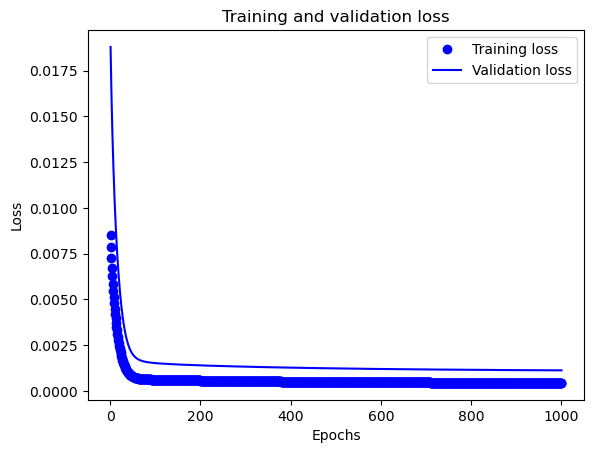

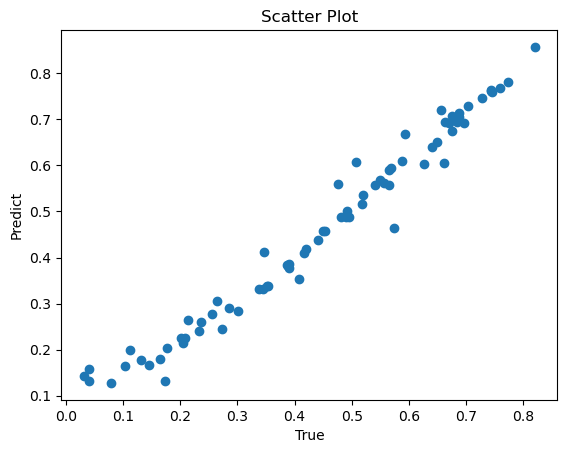

In [15]:
import matplotlib.pyplot as plt

epochs = range(1, len(history_dict['train_l']) + 1)

plt.plot(epochs, history_dict['train_l'], 'bo', label='Training loss')
plt.plot(epochs, history_dict['val_l'], 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.title('Scatter Plot')
plt.xlabel('True')
plt.ylabel('Predict')
#print("y_test",len(y_test))
#print("A2",len(A2))
plt.scatter(y_test, Final_A2)

In [16]:
# Replace this part with your own code without using any deep learning library

"""from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(2, activation='tanh', input_shape=(2,)))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='sgd', loss='mse')
history = model.fit(partial_x_train, partial_y_train, epochs=100, batch_size=1, validation_data=(x_val, y_val))
history_dict = history.history

# Your program should store the training loss and the validation loss for each epoch
# A list of traing losses -> loss_values
# A list of validation losses -> val_loss_values
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

# Your program should return the prediction for a given input.
y_pred = model.predict(x_test)"""


"from keras import models\nfrom keras import layers\n\nmodel = models.Sequential()\nmodel.add(layers.Dense(2, activation='tanh', input_shape=(2,)))\nmodel.add(layers.Dense(1, activation='sigmoid'))\nmodel.compile(optimizer='sgd', loss='mse')\nhistory = model.fit(partial_x_train, partial_y_train, epochs=100, batch_size=1, validation_data=(x_val, y_val))\nhistory_dict = history.history\n\n# Your program should store the training loss and the validation loss for each epoch\n# A list of traing losses -> loss_values\n# A list of validation losses -> val_loss_values\nloss_values = history_dict['loss']\nval_loss_values = history_dict['val_loss']\n\n# Your program should return the prediction for a given input.\ny_pred = model.predict(x_test)"